### Exploratory Data Analysis

https://www.mdpi.com/2306-5729/7/11/146<br>
- Marital status:                                     Categorical         The marital status of the student.<br>
- Application mode:                                   Categorical         The method of application used by the student. <br>
- Application order:                                  Numerical           The order in which the student applied.<br>
- Course:                                             Categorical         The course taken by the student. <br>
- Daytime/evening attendance:                         Categorical         Whether the student attends classes during the day or in the evening. <br> 
- Previous qualification:                             Categorical         The qualification obtained by the student before enrolling in higher education. <br> 
- Nacionality:                                        Categorical         The nationality of the student. <br> 
- Mother's qualification:                             Categorical         The qualification of the student's mother. <br> 
- Father's qualification:                             Categorical         The qualification of the student's father. <br>
- Mother's occupation:                                Categorical         The occupation of the student's mother. <br>
- Father's occupation:                                Categorical         The occupation of the student's father. <br>
- Displaced:                                          Categorical         Whether the student is a displaced person. <br>

In [1]:
# Basic Libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
sb.set_palette(sb.color_palette("Set2"))

# Import the Dataset
df = pd.read_csv('datasets/student-dropout-academic-success-raw.csv')

**Marital Status**<br><br>
Majority of Students are **Single**

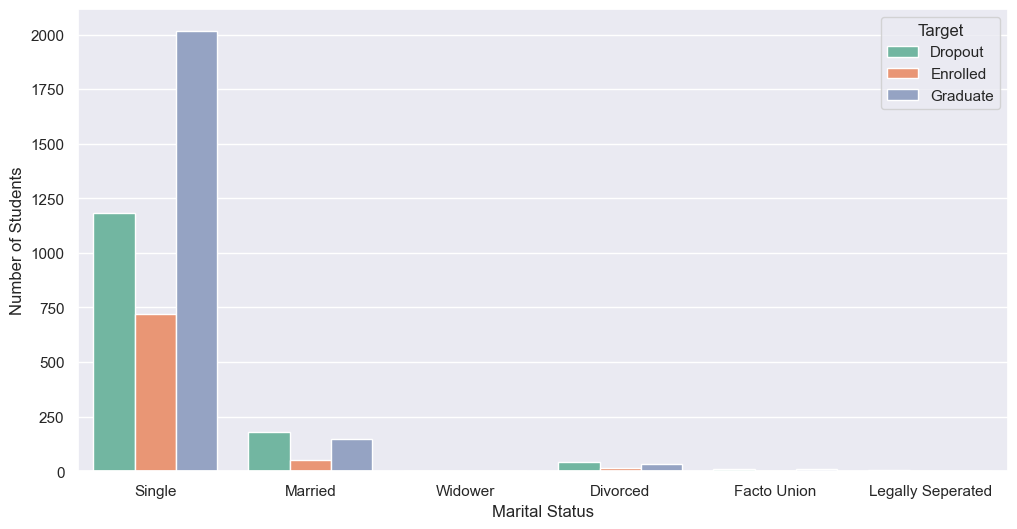

In [2]:
plt.figure(figsize = (12, 6))
sb.countplot(data = df, x = 'Marital status', hue = 'Target', hue_order = ['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks = [0, 1, 2, 3, 4, 5], labels=['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Seperated'])
plt.xlabel('Marital Status')
plt.ylabel('Number of Students')
plt.show()

**Application Mode**<br><br>
Majority of Dropouts applied **over 23 Years Old**<br>
Majority of Enrolled applied through the **1st Phase - General Contingent**<br>
Majority of Graduates applied through the **1st Phase - General Contingent**

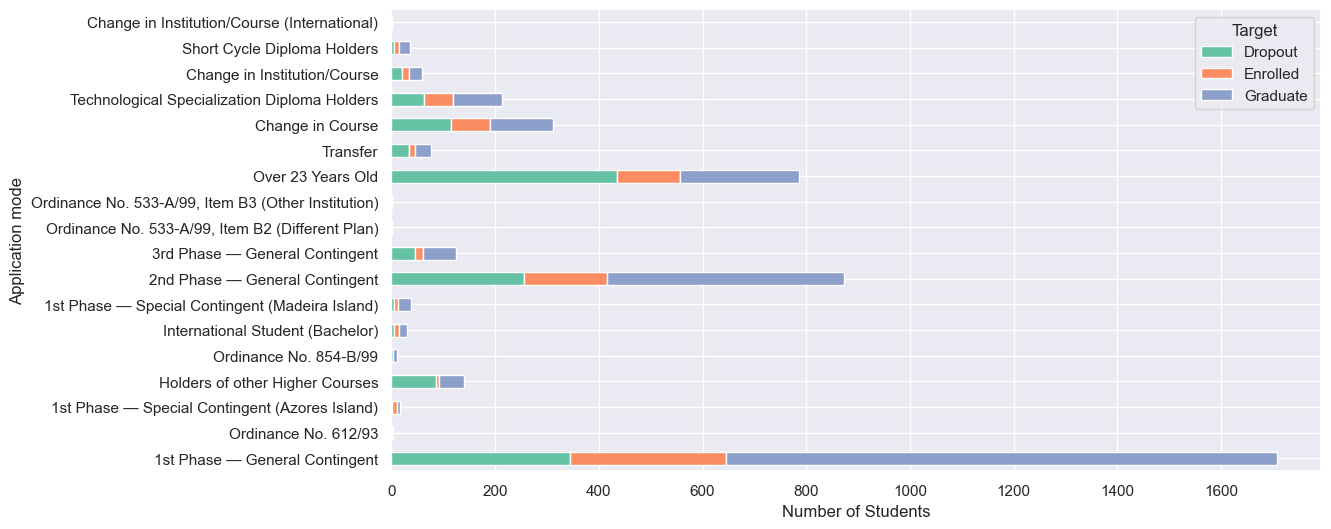

In [3]:
application_mode_df = df.groupby(['Application mode', 'Target']).size().reset_index().pivot(columns = 'Target', index = 'Application mode', values = 0)

application_mode_df.rename(index = {1: "1st Phase — General Contingent", 2: "Ordinance No. 612/93",  3: "1st Phase — Special Contingent (Azores Island)", 4: "Holders of other Higher Courses", 5: "Ordinance No. 854-B/99", 6: "International Student (Bachelor)", 7: "1st Phase — Special Contingent (Madeira Island)", 8: "2nd Phase — General Contingent", 9: "3rd Phase — General Contingent", 10: "Ordinance No. 533-A/99, Item B2 (Different Plan)", 11: "Ordinance No. 533-A/99, Item B3 (Other Institution)", 12: "Over 23 Years Old", 13: "Transfer", 14: "Change in Course", 15: "Technological Specialization Diploma Holders", 16: "Change in Institution/Course", 17: "Short Cycle Diploma Holders", 18: "Change in Institution/Course (International)"}, inplace = True)
application_mode_df.plot(kind = 'barh', stacked = True, figsize = (12, 6))

plt.xlabel('Number of Students')
plt.show()

**Application Order**<br><br>
Mojority of Students applied with **order 1**

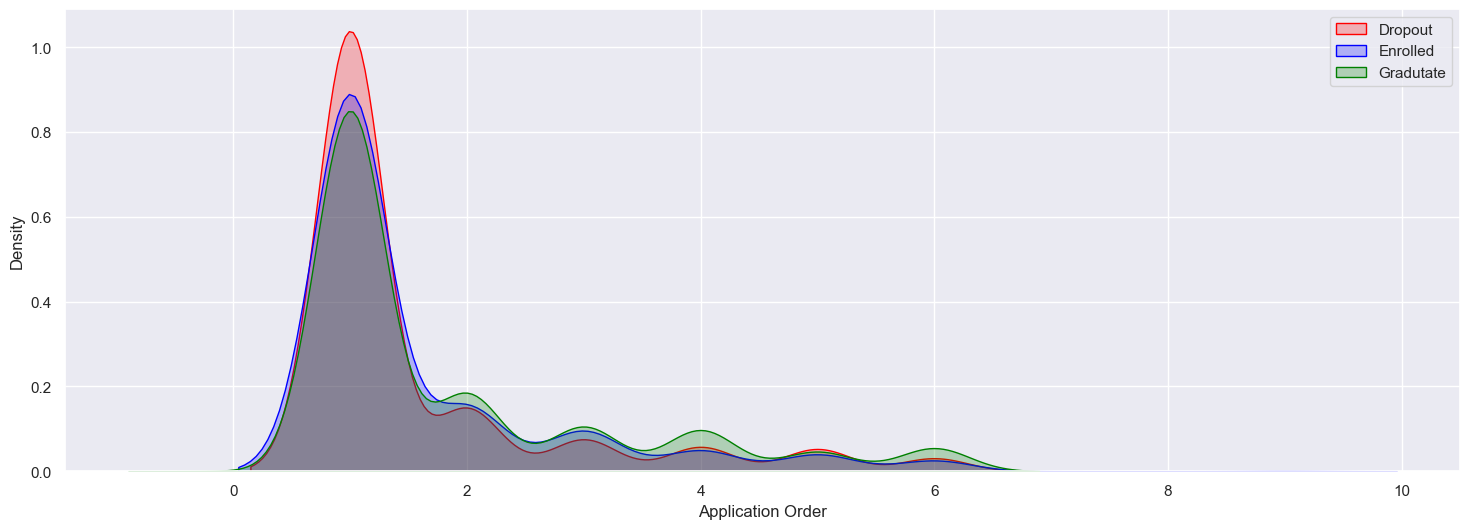

In [4]:
fig, ax = plt.subplots(figsize = (18, 6))

sb.kdeplot(df[df["Target"]=="Dropout"]["Application order"], shade=True, color="red", label="Dropout", ax=ax)
sb.kdeplot(df[df["Target"]=="Enrolled"]["Application order"], shade=True, color="blue", label="Enrolled", ax=ax)
sb.kdeplot(df[df["Target"]=="Graduate"]["Application order"], shade=True, color="green", label="Gradutate", ax=ax)

ax.set_xlabel("Application Order")
ax.set_ylabel("Density")
plt.legend()
plt.show()

<AxesSubplot:xlabel='Target', ylabel='Application order'>

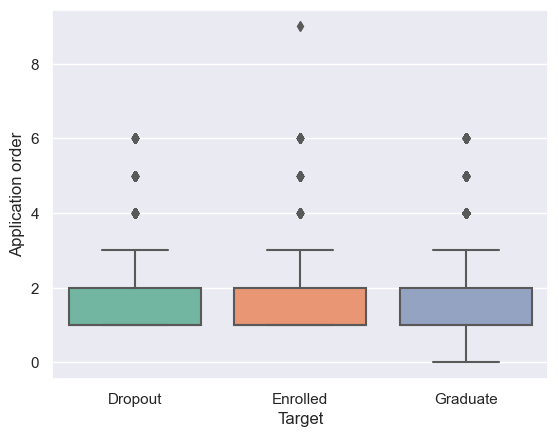

In [5]:
median = df[["Application order", "Target"]].groupby("Target").median().sort_values(by = "Application order")
sb.boxplot(x = "Target", y = "Application order", data = df, order = median.index)

**Course**<br><br>
**Nursing** Course produced the highest number of Graduates.<br>
**Management** Course produces the highest number of Dropouts.

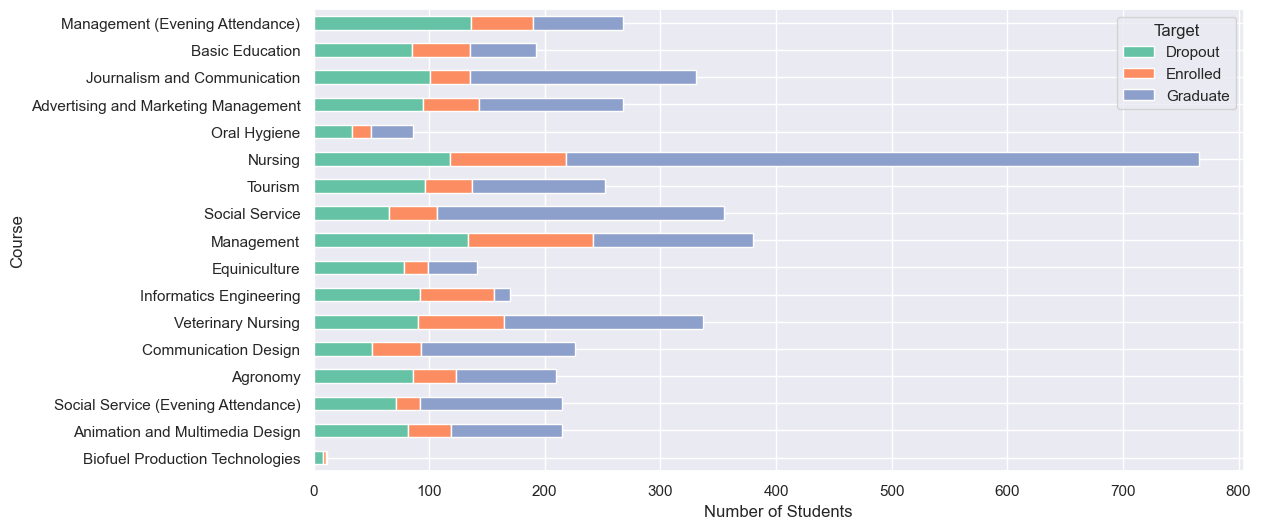

In [6]:
course_df = df.groupby(['Course', 'Target']).size().reset_index().pivot(columns = 'Target', index = 'Course', values = 0)

course_df.rename(index = {1: 'Biofuel Production Technologies', 2: 'Animation and Multimedia Design', 3: 'Social Service (Evening Attendance)', 4: 'Agronomy', 5: 'Communication Design', 6: 'Veterinary Nursing', 7: 'Informatics Engineering', 8: 'Equiniculture', 9: 'Management', 10: 'Social Service', 11: 'Tourism', 12: 'Nursing', 13: 'Oral Hygiene', 14: 'Advertising and Marketing Management', 15: 'Journalism and Communication', 16: 'Basic Education', 17: 'Management (Evening Attendance)'}, inplace = True)
course_df.plot(kind = 'barh', stacked = True, figsize = (12, 6))

plt.xlabel('Number of Students')
plt.show()

**Daytime/Evening Attendance**<br><br>
Majority of Students attend school during **Daytime**

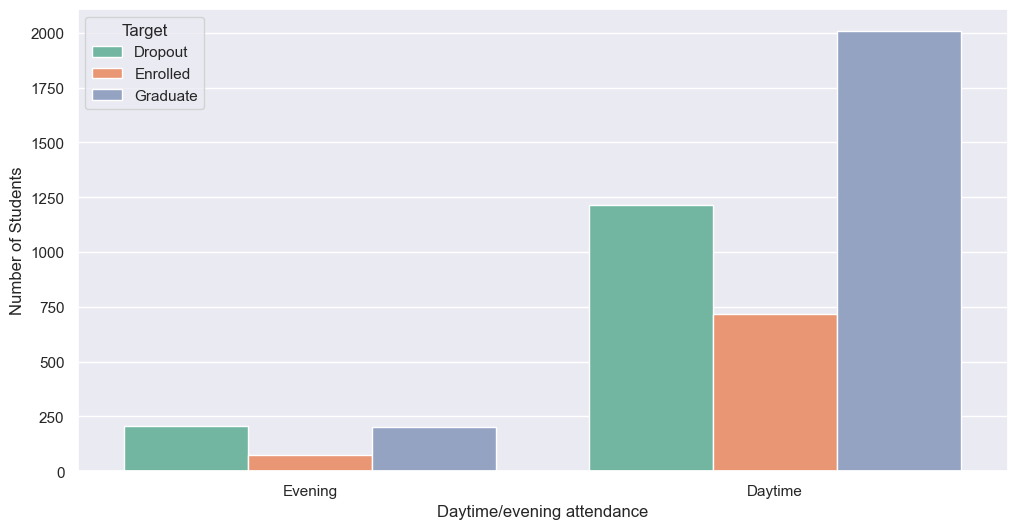

In [7]:
plt.figure(figsize = (12, 6))
sb.countplot(data = df, x = 'Daytime/evening attendance', hue = 'Target', hue_order = ['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks = [0, 1], labels = ['Evening', 'Daytime'])
plt.ylabel('Number of Students')
plt.show()

**Previous Qualification**<br><br>
Majority of Students finished **Secondary Education**

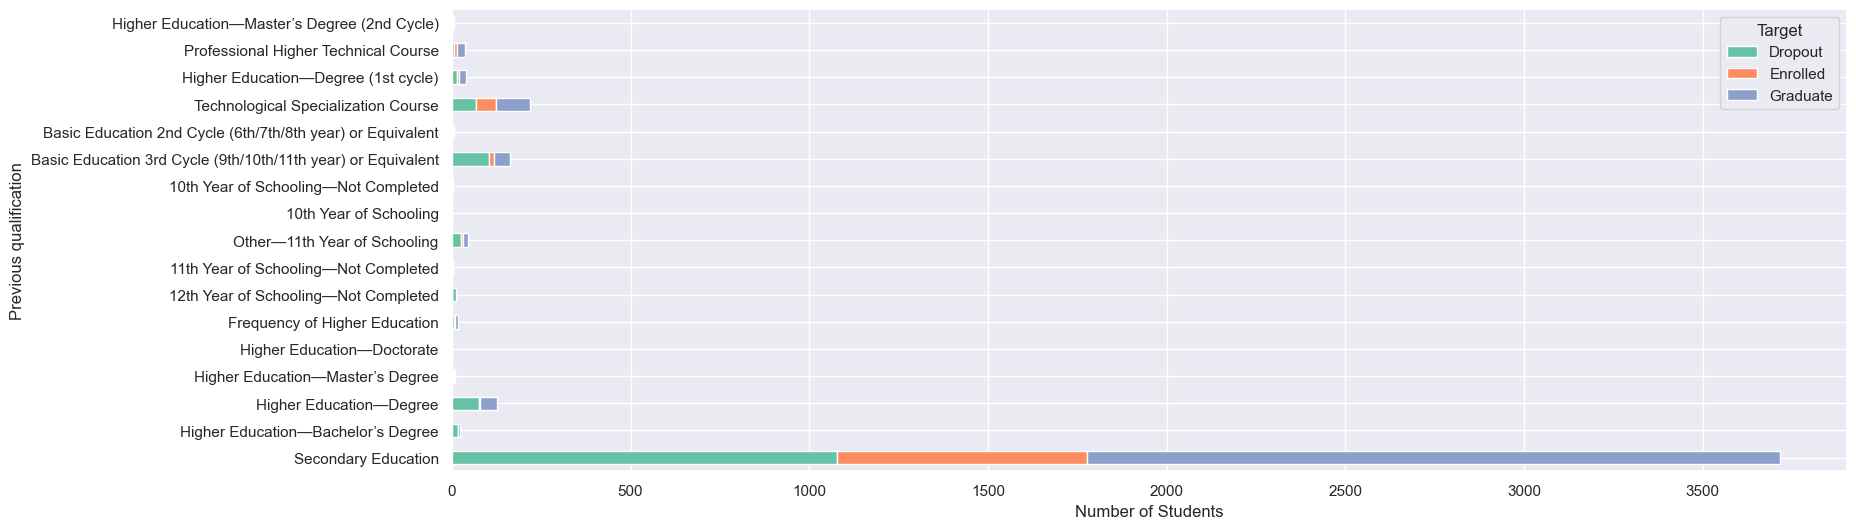

In [8]:
prevqual_df = df.groupby(['Previous qualification', 'Target']).size().reset_index().pivot(columns = 'Target', index = 'Previous qualification', values = 0)

prevqual_df.rename(index = {1: 'Secondary Education', 2: 'Higher Education—Bachelor’s Degree', 3: 'Higher Education—Degree', 4: 'Higher Education—Master’s Degree', 5: 'Higher Education—Doctorate', 6: 'Frequency of Higher Education', 7: '12th Year of Schooling—Not Completed', 8: '11th Year of Schooling—Not Completed', 9: 'Other—11th Year of Schooling', 10: '10th Year of Schooling', 11: '10th Year of Schooling—Not Completed', 12: 'Basic Education 3rd Cycle (9th/10th/11th year) or Equivalent', 13: 'Basic Education 2nd Cycle (6th/7th/8th year) or Equivalent', 14: 'Technological Specialization Course', 15: 'Higher Education—Degree (1st cycle)', 16: 'Professional Higher Technical Course', 17: 'Higher Education—Master’s Degree (2nd Cycle)'}, inplace = True)
prevqual_df.plot(kind = 'barh', stacked = True, figsize = (18, 6))

plt.xlabel('Number of Students')
plt.show()

**Nationality**<br><br>
Majority of Students are **Portuguese**

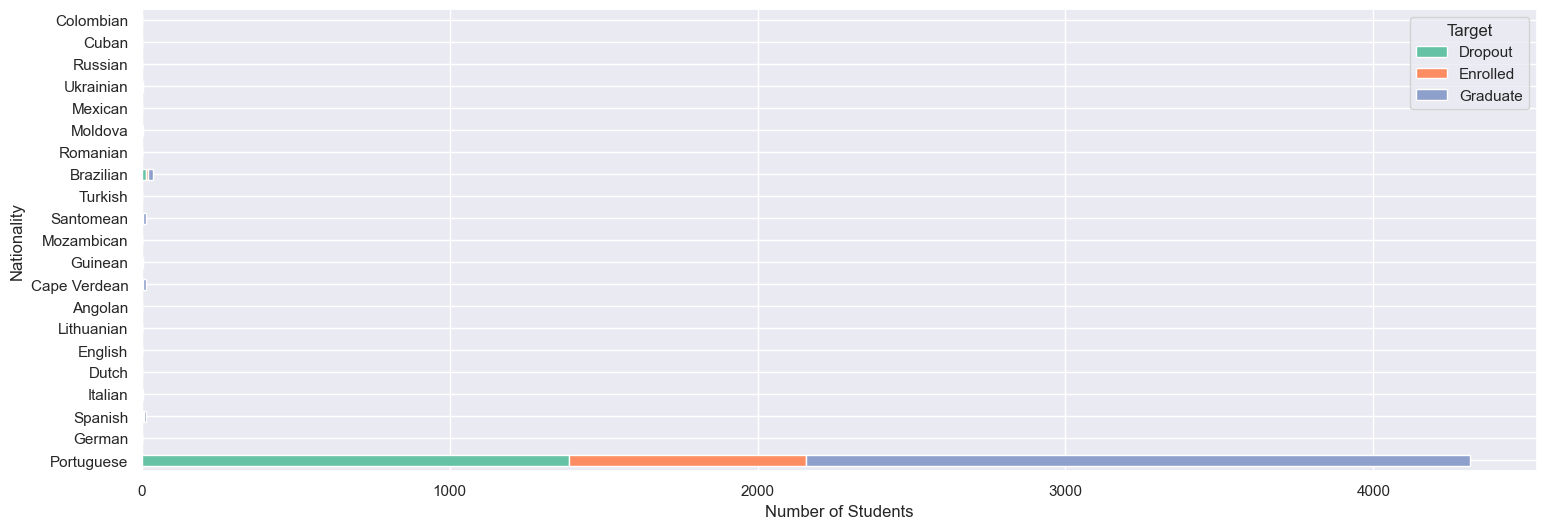

In [9]:
nationality_df = df.groupby(['Nacionality', 'Target']).size().reset_index().pivot(columns = 'Target', index = 'Nacionality', values = 0)

nationality_df.rename(index = {1: 'Portuguese', 2: 'German', 3: 'Spanish', 4: 'Italian', 5: 'Dutch', 6: 'English', 7: 'Lithuanian', 8: 'Angolan', 9: 'Cape Verdean', 10: 'Guinean', 11: 'Mozambican', 12: 'Santomean', 13: 'Turkish', 14: 'Brazilian', 15: 'Romanian', 16: 'Moldova', 17: 'Mexican', 18: 'Ukrainian', 19: 'Russian', 20: 'Cuban', 21: 'Colombian'}, inplace = True)
nationality_df.plot(kind = 'barh', stacked = True, figsize = (18, 6))

plt.xlabel('Number of Students')
plt.ylabel('Nationality')
plt.show()

**Mother's Qualification**<br><br>
Majority of Dropout Students Mother's completed **General Course of Administration and Commerce**<br>
Majority of Enrolled Students Mother's completed **Secondary Education — 12th Year of Schooling or Equivalent**<br>
Majority of Graduate Students Mother's completed **Secondary Education — 12th Year of Schooling or Equivalent**

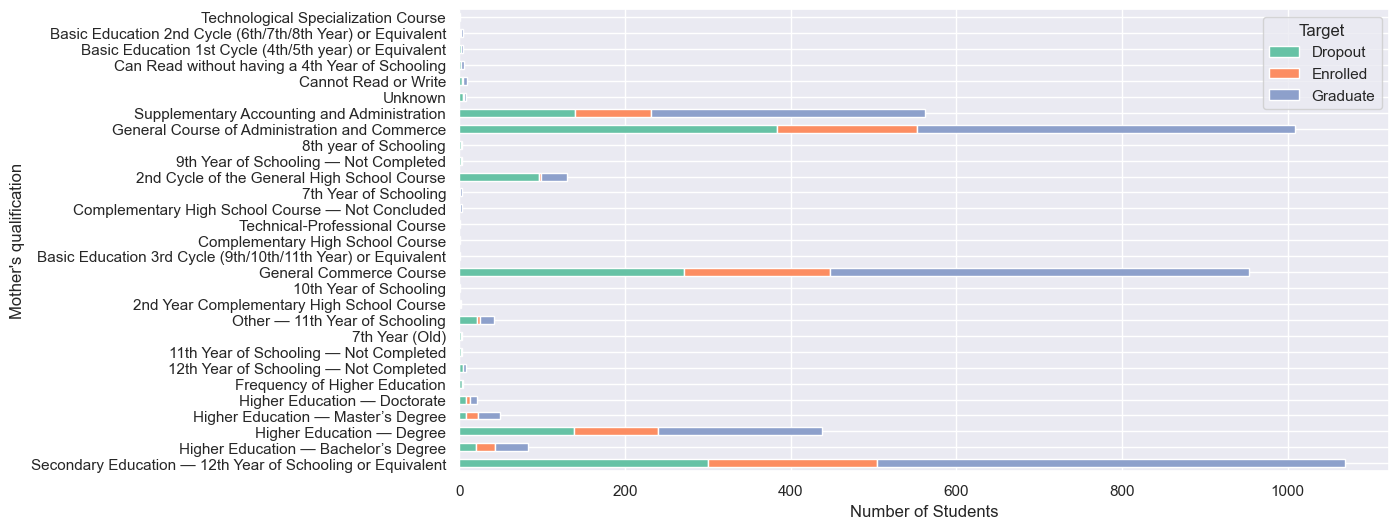

In [10]:
mother_qual_df = df.groupby(["Mother's qualification", "Target"]).size().reset_index().pivot(columns = 'Target', index = "Mother's qualification", values = 0)

mother_qual_df.rename(index = {1: "Secondary Education — 12th Year of Schooling or Equivalent", 2: "Higher Education — Bachelor’s Degree", 3: "Higher Education — Degree", 4: "Higher Education — Master’s Degree", 5: "Higher Education — Doctorate", 6: "Frequency of Higher Education", 7: "12th Year of Schooling — Not Completed", 8: "11th Year of Schooling — Not Completed", 9: "7th Year (Old)", 10: "Other — 11th Year of Schooling", 11: "2nd Year Complementary High School Course", 12: "10th Year of Schooling", 13: "General Commerce Course", 14: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent", 15: "Complementary High School Course", 16: "Technical-Professional Course", 17: "Complementary High School Course — Not Concluded", 18: "7th Year of Schooling", 19: "2nd Cycle of the General High School Course", 20: "9th Year of Schooling — Not Completed", 21: "8th year of Schooling", 22: "General Course of Administration and Commerce", 23: "Supplementary Accounting and Administration", 24: "Unknown", 25: "Cannot Read or Write", 26: "Can Read without having a 4th Year of Schooling", 27: "Basic Education 1st Cycle (4th/5th year) or Equivalent", 28: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equivalent", 29: "Technological Specialization Course", 30: "Higher Education — Degree (1st Cycle)", 31: "Specialized Higher Studies Course", 32: "Professional Higher Technical Course", 33: "Higher Education — Master’s Degree (2nd Cycle)", 34: "Higher Education — Doctorate (3rd Cycle)"}, inplace = True)
mother_qual_df.plot(kind = 'barh', stacked = True, figsize = (12, 6))

plt.xlabel('Number of Students')
plt.show()

**Father's Qualification**<br><br>
Majority of Student's Father completed **Basic Education 1st Cycle (4th/5th Year) or Equivalent**<br>

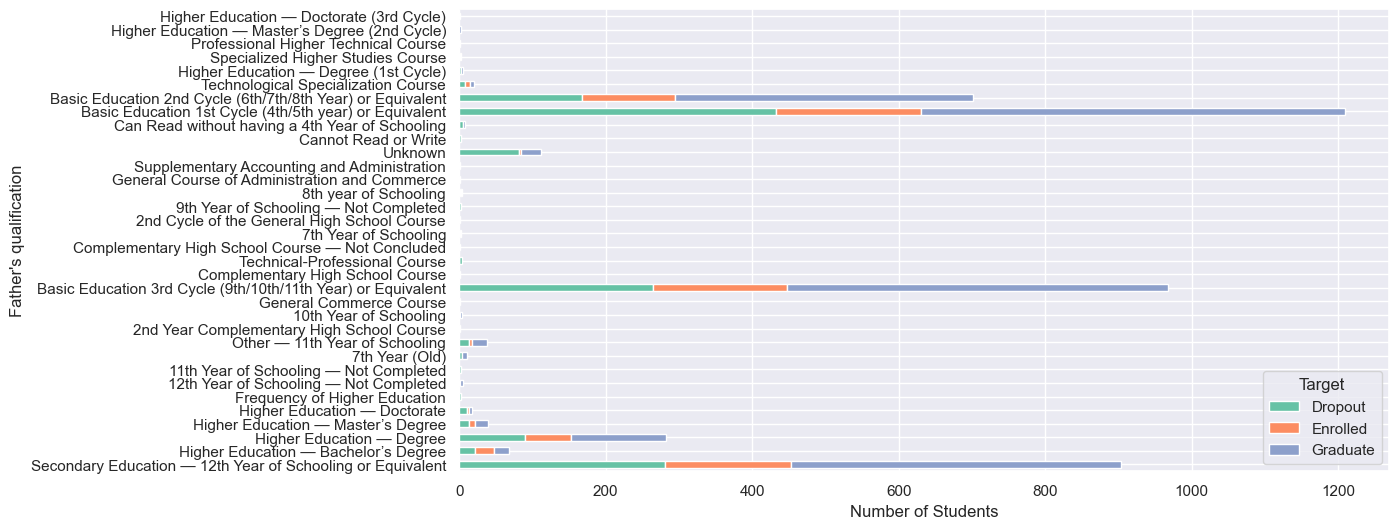

In [11]:
father_qual_df = df.groupby(["Father's qualification", "Target"]).size().reset_index().pivot(columns = 'Target', index = "Father's qualification", values = 0)

father_qual_df.rename(index = {1: "Secondary Education — 12th Year of Schooling or Equivalent", 2: "Higher Education — Bachelor’s Degree", 3: "Higher Education — Degree", 4: "Higher Education — Master’s Degree", 5: "Higher Education — Doctorate", 6: "Frequency of Higher Education", 7: "12th Year of Schooling — Not Completed", 8: "11th Year of Schooling — Not Completed", 9: "7th Year (Old)", 10: "Other — 11th Year of Schooling", 11: "2nd Year Complementary High School Course", 12: "10th Year of Schooling", 13: "General Commerce Course", 14: "Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent", 15: "Complementary High School Course", 16: "Technical-Professional Course", 17: "Complementary High School Course — Not Concluded", 18: "7th Year of Schooling", 19: "2nd Cycle of the General High School Course", 20: "9th Year of Schooling — Not Completed", 21: "8th year of Schooling", 22: "General Course of Administration and Commerce", 23: "Supplementary Accounting and Administration", 24: "Unknown", 25: "Cannot Read or Write", 26: "Can Read without having a 4th Year of Schooling", 27: "Basic Education 1st Cycle (4th/5th year) or Equivalent", 28: "Basic Education 2nd Cycle (6th/7th/8th Year) or Equivalent", 29: "Technological Specialization Course", 30: "Higher Education — Degree (1st Cycle)", 31: "Specialized Higher Studies Course", 32: "Professional Higher Technical Course", 33: "Higher Education — Master’s Degree (2nd Cycle)", 34: "Higher Education — Doctorate (3rd Cycle)"}, inplace = True)
father_qual_df.plot(kind = 'barh', stacked = True, figsize = (12, 6))

plt.xlabel('Number of Students')
plt.show()

**Mother's Occupation**<br><br>
Majority of Students Mother's holds an occupation as an **Unskilled Workers**

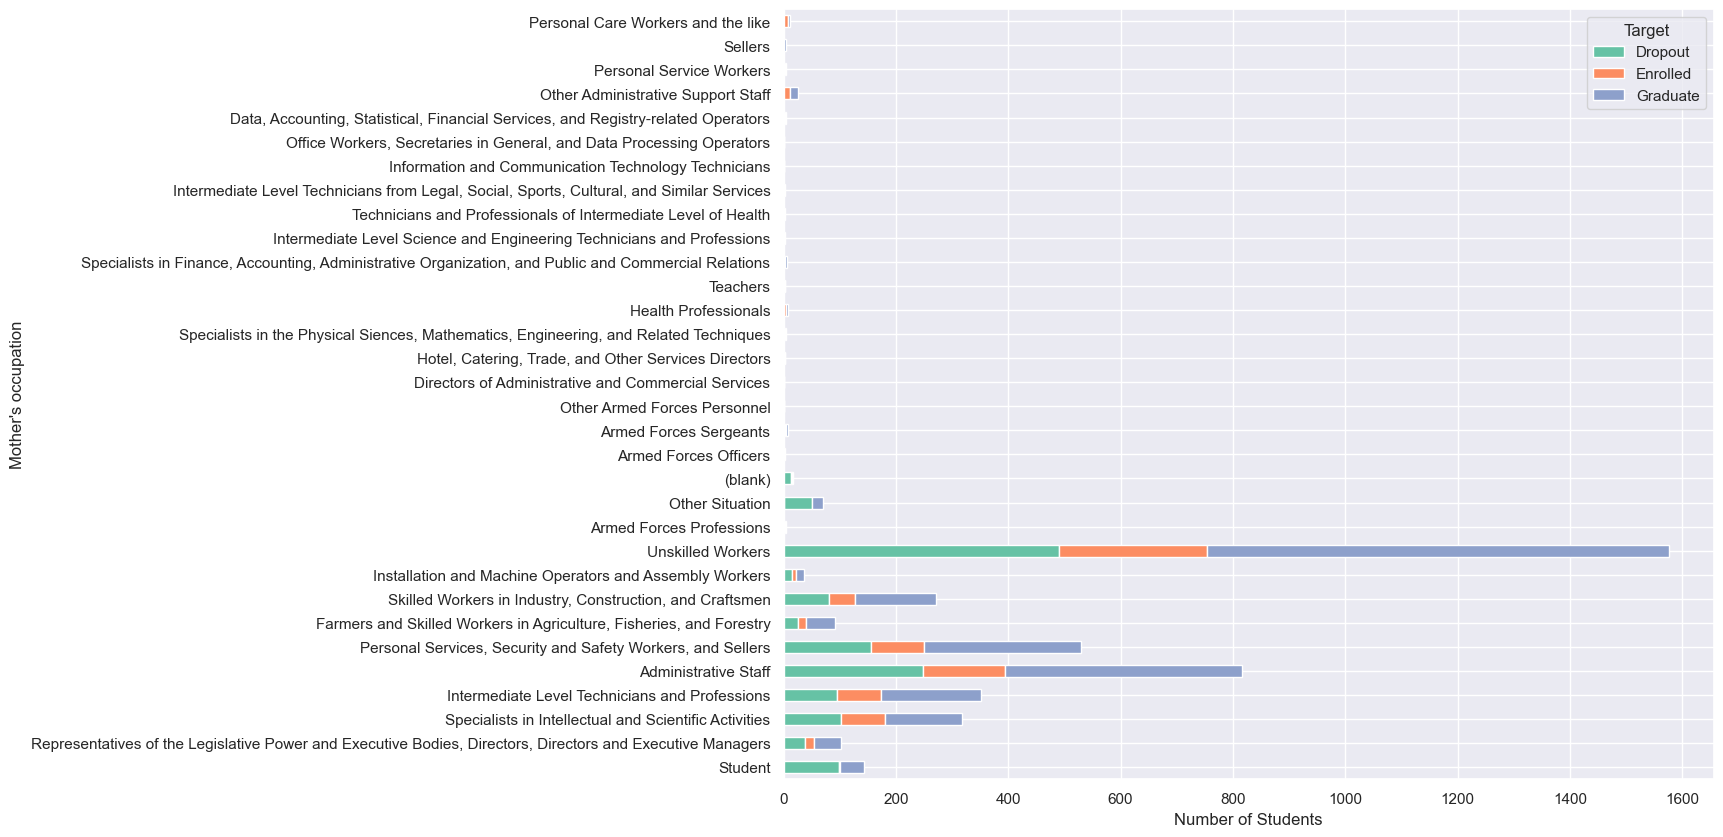

In [12]:
mother_occupation_df = df.groupby(["Mother's occupation", "Target"]).size().reset_index().pivot(columns = 'Target', index = "Mother's occupation", values = 0)

mother_occupation_df.rename(index = {1: "Student", 2: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers", 3: "Specialists in Intellectual and Scientific Activities", 4: "Intermediate Level Technicians and Professions", 5: "Administrative Staff", 6: "Personal Services, Security and Safety Workers, and Sellers", 7: "Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry", 8: "Skilled Workers in Industry, Construction, and Craftsmen", 9: "Installation and Machine Operators and Assembly Workers", 10: "Unskilled Workers", 11: "Armed Forces Professions", 12: "Other Situation", 13: "(blank)", 14: "Armed Forces Officers", 15: "Armed Forces Sergeants", 16: "Other Armed Forces Personnel", 17: "Directors of Administrative and Commercial Services", 18: "Hotel, Catering, Trade, and Other Services Directors", 19: "Specialists in the Physical Siences, Mathematics, Engineering, and Related Techniques", 20: "Health Professionals", 21: "Teachers", 22: "Specialists in Finance, Accounting, Administrative Organization, and Public and Commercial Relations", 23: "Intermediate Level Science and Engineering Technicians and Professions", 24: "Technicians and Professionals of Intermediate Level of Health", 25: "Intermediate Level Technicians from Legal, Social, Sports, Cultural, and Similar Services", 26: "Information and Communication Technology Technicians", 27: "Office Workers, Secretaries in General, and Data Processing Operators", 28: "Data, Accounting, Statistical, Financial Services, and Registry-related Operators", 29: "Other Administrative Support Staff", 30: "Personal Service Workers", 31: "Sellers", 32: "Personal Care Workers and the like", 33: "Protection and Security Services Personnel", 34: "Market-oriented Farmers and Skilled Agricultural and Animal Production Workers", 35: "Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, and Subsistence", 36: "Skilled Construction Workers and the like, except Electricians", 37: "Skilled Workers in Metallurgy, Metalworking, and Similar", 38: "Skilled Workers in Electricity and Electronics", 39: "Workers in Food Processing, Woodworking, and Clothing and other Industries and Crafts", 40: "Fixed Plant and Machine Operators", 41: "Assembly Workers", 42: "Vehicle Drivers and Mobile Equipment Operators", 43: "Unskilled Workers in Agriculture, Animal Production, and Fisheries and Forestry", 44: "Unskilled Workers in Extractive Industry, Construction, Manufacturing, and Transport", 45: "Meal Preparation Assistants", 46: "Street Vendors (except Food) and Street Service Providers"}, inplace = True)
mother_occupation_df.plot(kind = 'barh', stacked = True, figsize = (12, 10))

plt.xlabel('Number of Students')
plt.show()

**Father's Occupation**<br><br>

Majority of Dropout Students Father's holds an occupation as an **Unskilled Worker**

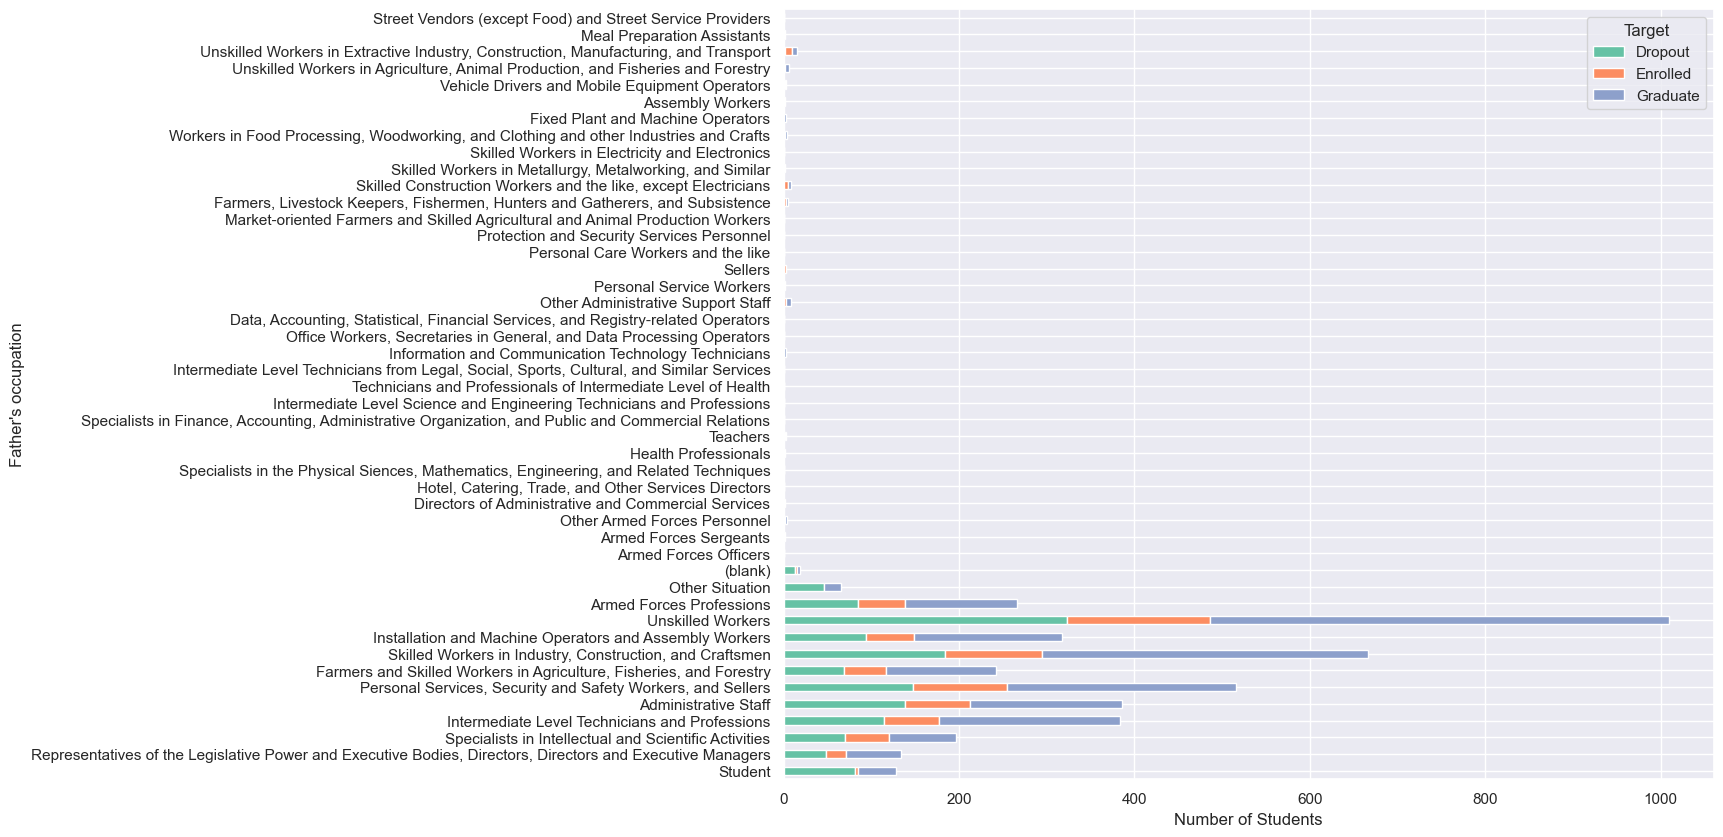

In [13]:
father_occupation_df = df.groupby(["Father's occupation", "Target"]).size().reset_index().pivot(columns = 'Target', index = "Father's occupation", values = 0)

father_occupation_df.rename(index = {1: "Student", 2: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers", 3: "Specialists in Intellectual and Scientific Activities", 4: "Intermediate Level Technicians and Professions", 5: "Administrative Staff", 6: "Personal Services, Security and Safety Workers, and Sellers", 7: "Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry", 8: "Skilled Workers in Industry, Construction, and Craftsmen", 9: "Installation and Machine Operators and Assembly Workers", 10: "Unskilled Workers", 11: "Armed Forces Professions", 12: "Other Situation", 13: "(blank)", 14: "Armed Forces Officers", 15: "Armed Forces Sergeants", 16: "Other Armed Forces Personnel", 17: "Directors of Administrative and Commercial Services", 18: "Hotel, Catering, Trade, and Other Services Directors", 19: "Specialists in the Physical Siences, Mathematics, Engineering, and Related Techniques", 20: "Health Professionals", 21: "Teachers", 22: "Specialists in Finance, Accounting, Administrative Organization, and Public and Commercial Relations", 23: "Intermediate Level Science and Engineering Technicians and Professions", 24: "Technicians and Professionals of Intermediate Level of Health", 25: "Intermediate Level Technicians from Legal, Social, Sports, Cultural, and Similar Services", 26: "Information and Communication Technology Technicians", 27: "Office Workers, Secretaries in General, and Data Processing Operators", 28: "Data, Accounting, Statistical, Financial Services, and Registry-related Operators", 29: "Other Administrative Support Staff", 30: "Personal Service Workers", 31: "Sellers", 32: "Personal Care Workers and the like", 33: "Protection and Security Services Personnel", 34: "Market-oriented Farmers and Skilled Agricultural and Animal Production Workers", 35: "Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, and Subsistence", 36: "Skilled Construction Workers and the like, except Electricians", 37: "Skilled Workers in Metallurgy, Metalworking, and Similar", 38: "Skilled Workers in Electricity and Electronics", 39: "Workers in Food Processing, Woodworking, and Clothing and other Industries and Crafts", 40: "Fixed Plant and Machine Operators", 41: "Assembly Workers", 42: "Vehicle Drivers and Mobile Equipment Operators", 43: "Unskilled Workers in Agriculture, Animal Production, and Fisheries and Forestry", 44: "Unskilled Workers in Extractive Industry, Construction, Manufacturing, and Transport", 45: "Meal Preparation Assistants", 46: "Street Vendors (except Food) and Street Service Providers"}, inplace = True)
father_occupation_df.plot(kind = 'barh', stacked = True, figsize = (12, 10))

plt.xlabel('Number of Students')
plt.show()

**Displaced**<br><br>
Majority of Dropout Students are **Not Displaced**<br>
Majority of Enrolled Students are **Displaced**<br>
Majority of Graduate Students are **Displaced**

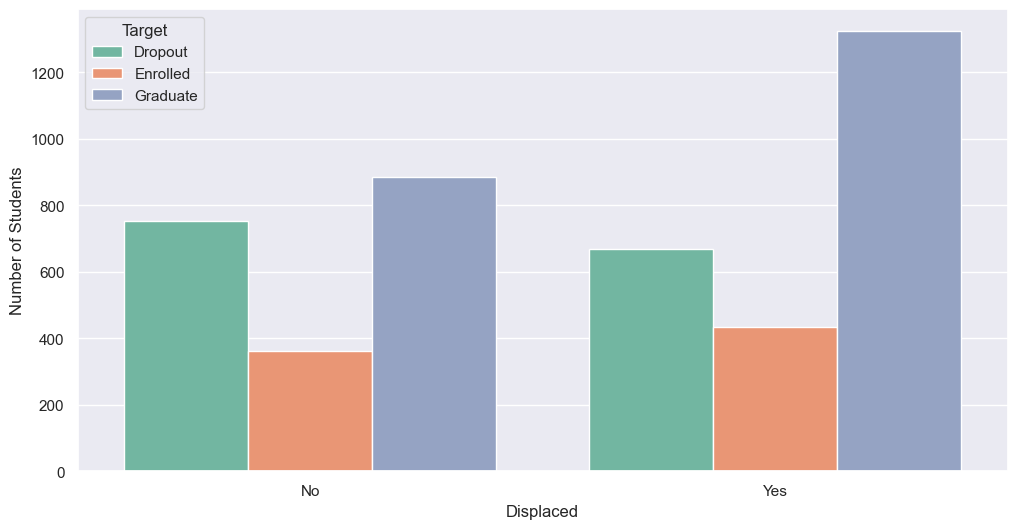

In [14]:
plt.figure(figsize = (12, 6))
sb.countplot(data = df, x = 'Displaced', hue = 'Target', hue_order = ['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'])
plt.ylabel('Number of Students')
plt.show()